In [1]:
import hrr_reader
import numpy as np
import holoviews as hv
import glob
import os
from rdp import rdp
hv.notebook_extension()

In [2]:
filelist = glob.glob('itemhrr/*.csv')
print len(filelist)
print filelist

16
['itemhrr\\B.csv', 'itemhrr\\Bedroomflash.csv', 'itemhrr\\C.csv', 'itemhrr\\Co.csv', 'itemhrr\\CT.csv', 'itemhrr\\D.csv', 'itemhrr\\De.csv', 'itemhrr\\E.csv', 'itemhrr\\K.csv', 'itemhrr\\L.csv', 'itemhrr\\livroomflash.csv', 'itemhrr\\N.csv', 'itemhrr\\Q.csv', 'itemhrr\\TV.csv', 'itemhrr\\Tw.csv', 'itemhrr\\W.csv']


In [3]:
itemlist = []
for name in filelist:
    itemlist.append(hrr_reader.read_hrr(name))
print filelist[0]
test2 = np.loadtxt(filelist[0],delimiter=',')
print test2
test = hrr_reader.read_hrr(filelist[0])
print test

itemhrr\B.csv
[[    0.       0.  ]
 [   81.35     4.03]
 [  137.57    71.69]
 [  166.82   117.71]
 [  193.2    218.49]
 [  219.11   383.19]
 [  242.08   611.78]
 [  257.81   818.97]
 [  278.9    968.39]
 [  299.71   822.52]
 [  315.27   719.21]
 [  345.83   588.69]
 [  386.43   433.93]
 [  451.31   331.22]
 [  573.15   195.72]
 [  798.06   128.44]
 [ 1054.69   107.21]
 [ 1180.34   123.96]
 [ 1308.7    107.26]
 [ 1439.57    84.5 ]
 [ 1676.52    56.94]
 [ 1792.39    61.4 ]
 [ 1871.35    56.27]]
[[    0.       0.  ]
 [   81.35     4.03]
 [  137.57    71.69]
 [  166.82   117.71]
 [  193.2    218.49]
 [  219.11   383.19]
 [  242.08   611.78]
 [  257.81   818.97]
 [  278.9    968.39]
 [  299.71   822.52]
 [  315.27   719.21]
 [  345.83   588.69]
 [  386.43   433.93]
 [  451.31   331.22]
 [  573.15   195.72]
 [  798.06   128.44]
 [ 1054.69   107.21]
 [ 1180.34   123.96]
 [ 1308.7    107.26]
 [ 1439.57    84.5 ]
 [ 1676.52    56.94]
 [ 1792.39    61.4 ]
 [ 1871.35    56.27]]


In [4]:
for item in itemlist:
    print item.shape[0]

23
18
21
369
29
12
29
3
6
11
45
3
6
12
6
25


23
14
procedure completed in 2 iterations
final value of epsilon is 29.0517


:Layout
   .Curve.I  :Curve   [x]   (y)
   .Curve.II :Curve   [x]   (y)
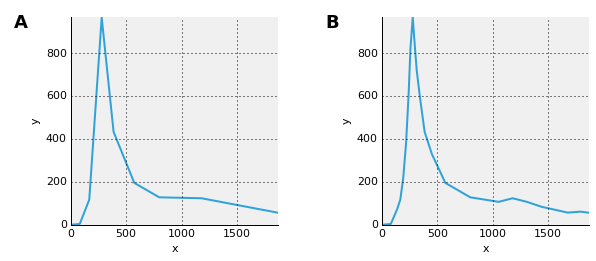

In [5]:
test3 = hrr_reader.simplify_hrr(test2,npoints=12,maxiter=5)
tv3 = hv.Curve(test3)
tv2 = hv.Curve(test2)
tv3+tv2

In [6]:
wut = np.array([1, 1, 2, 2, 3, 3, 4, 4]).reshape(4, 2)
print wut
test4 = rdp(wut)
print test4
test4 = rdp(test4)

[[1 1]
 [2 2]
 [3 3]
 [4 4]]
[[1 1]
 [4 4]]


In [11]:
testmore = itemlist[3]
testmore2 = rdp(testmore,epsilon=100)
testmore3 = hrr_reader.simplify_hrr(testmore,npoints=100)
print len(testmore)
print len(testmore2)
print len(testmore3)
print testmore3

369
procedure completed in 1 iterations
final value of epsilon is 46.636
369
7
16
[[    0.        0.   ]
 [   40.       76.479]
 [   92.      579.48 ]
 [  144.     2331.8  ]
 [  156.     2085.7  ]
 [  204.     2183.3  ]
 [  260.     1151.6  ]
 [  364.      508.49 ]
 [  428.      481.48 ]
 [  456.      558.76 ]
 [  536.      606.72 ]
 [  644.      366.03 ]
 [  756.      251.44 ]
 [ 1012.      180.38 ]
 [ 1452.      151.11 ]
 [ 1472.        0.   ]]


:Layout
   .Curve.I   :Curve   [x]   (y)
   .Curve.II  :Curve   [x]   (y)
   .Curve.III :Curve   [x]   (y)
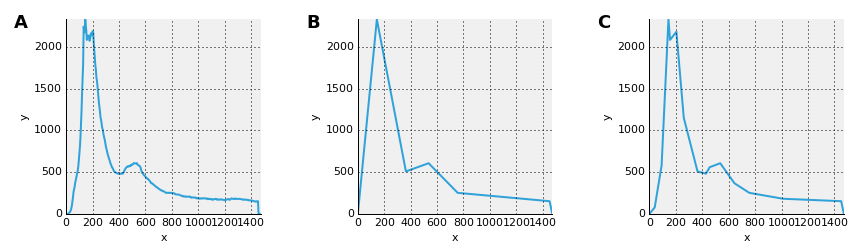

In [12]:
testvis = hv.Curve(testmore)
testvis2 = hv.Curve(testmore2)
testvis3 = hv.Curve(testmore3)
testvis+testvis2+testvis3

2300
2300


:Curve   [x]   (y)
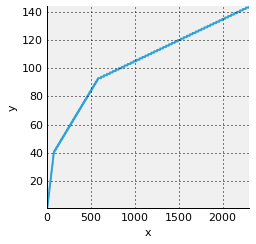

In [13]:
smot = hrr_reader.smooth_hrr(testmore3)
max(smot(np.arange(0,2000,1)))
hrr_reader.timefind(2400,testmore3)
timeslice = []
for i in np.arange(0,2300,1):
    timeslice.append(hrr_reader.timefind(i,testmore3))
times = np.asarray(timeslice)
vals = np.arange(0,2300,1)
print len(times)
print len(np.arange(0,2300,1))
hv.Curve(np.stack((vals,times),axis=1))